# Analysis of Kr MC

In [1]:
from __future__ import print_function
import tables as tb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import copy
import glob
import os

import Core.mplFunctions as mpl
import Core.wfmFunctions as wfm
import Core.snsFunctions as sns
import Core.fitFunctions as fit
import Core.tblFunctions as tbl

import Database.loadDB as DB

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

This notebook has been run last on 05/12/2016 at 20:17:55.


In [2]:
pmtdf = DB.DataPMT()
sipmdf = DB.DataSiPM()

In [3]:
adc_to_pes = -1.0/pmtdf["adc_to_pes"].values.reshape(12,1)

In [4]:
wffile = tb.open_file("/Users/Gonzalo/github/IC/data/MC/Kr/Kr_RWF.h5")
cwf = wffile.root.RD.pmtcwf

In [5]:
def sum_wf(wfs):
    return np.sum(wfs * adc_to_pes, axis=0)

def zs_wf(wf, thrs=0.5):
    wf = sum_wf(wf)
    t = np.arange(wf.size)/40.
    df = wfm.wf2df(t, wf)
    return wfm.wf_thr(df, thrs)

def find_peaks(wf, stride=100., min_length=100.):
    peaks = []
    t, e = wf.time_mus.values, wf.ene_pes.values
    begin = 0
    stride /= 25.
    min_length = int(min_length/25.)
    for i in range(1, t.size):
        if t[i] - t[i-1] > stride:
            if i - begin > min_length:
                peaks.append(wfm.wf2df(t[begin:i], e[begin:i]))
            begin = i
    if begin != i:
        peaks.append(wfm.wf2df(t[begin:i], e[begin:i]))
    return peaks

def plot_peaks(peaks):
    fig = plt.figure()
    fig.set_size_inches(9,7)
    for peak in peaks:
        fig.clear()
        plt.plot(peak.time_mus.values, peak.ene_pes.values)
        plt.show()
        
        raw_input("size: {} mus; E: {:.2} pes; time: {}->".format(len(peak)/40.,
                                                                  peak.ene_pes.sum(),
                                                                  peak.time_mus[np.argmax(peak.ene_pes.values)]))

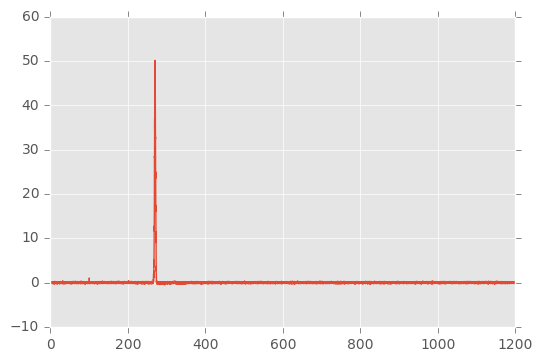

In [6]:
wf0 = sum_wf(cwf[0])
plt.plot(np.arange(48000)/40., wf0)

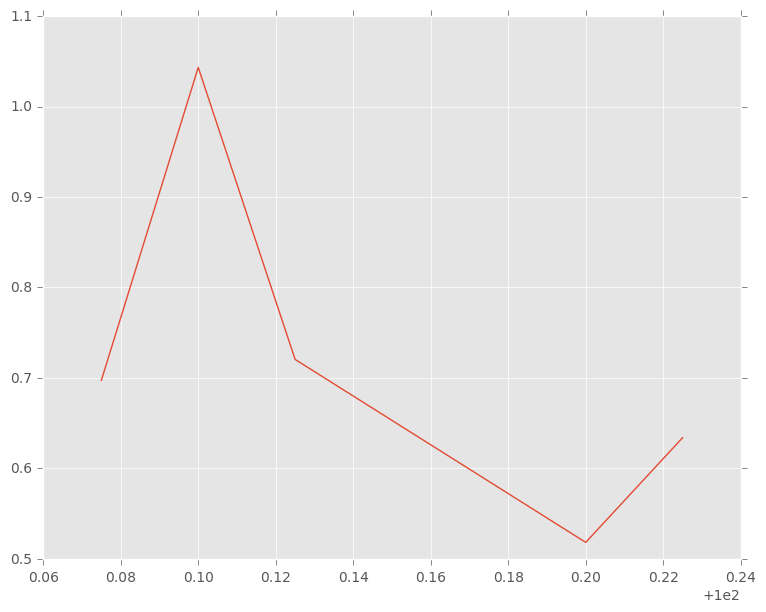

size: 0.125 mus; E: 3.6 pes; time: 100.1->


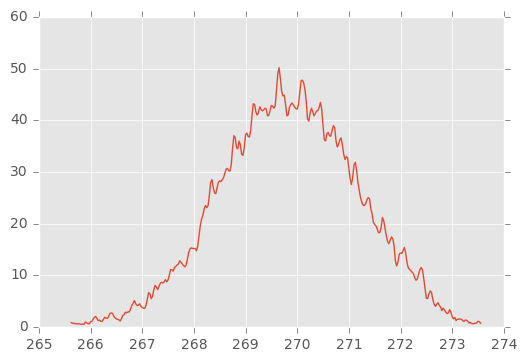

size: 7.775 mus; E: 6.1e+03 pes; time: 269.65->


In [7]:
peaks = find_peaks(zs_wf(cwf[0]))
plot_peaks(peaks)

In [8]:
pmaps = []
for i in range(cwf.shape[0]):
    if not i%100:
        print(i)
    pmaps.append(find_peaks(zs_wf(cwf[i])))
#pmaps = map(find_peaks, map(zs_wf, cwf))

0
100
200
300
400
500
600
700
800
900


In [23]:
t, w, e, m, n = [], [], [], [], []
for pmap in pmaps:
    n.append(len(pmap))
    for peak in pmap:
        t.append(peak.time_mus[np.argmax(peak.ene_pes.values)])
        w.append(peak.time_mus.values.size)
        e.append(peak.ene_pes.values.sum())
        m.append(peak.ene_pes.values.max())
t, w, e, m = map(np.array, [t, w, e, m])
w = w/40.
r = m/e

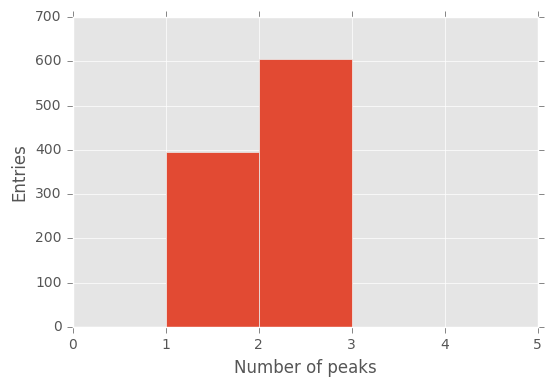

In [24]:
h = plt.hist(n, 5, range=(0,5))
plt.xlabel("Number of peaks")
plt.ylabel("Entries")

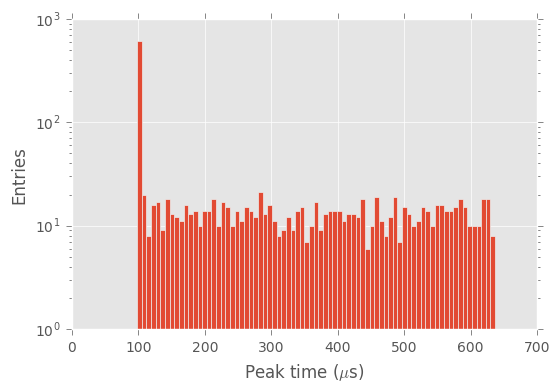

In [10]:
h = plt.hist(t, 100, range=(0,700))
plt.yscale("log")
plt.xlabel("Peak time ($\mu$s)")
plt.ylabel("Entries")

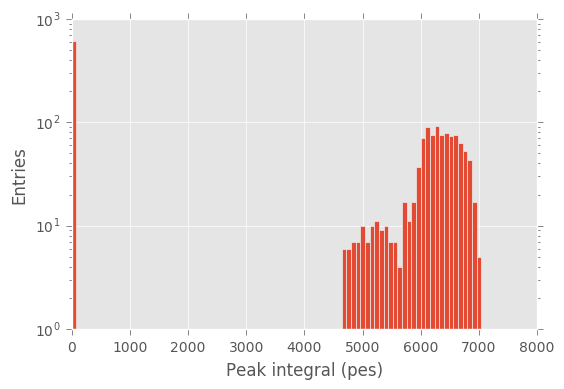

In [11]:
h = plt.hist(e, 100, range=(0,8000))
plt.yscale("log")
plt.xlabel("Peak integral (pes)")
plt.ylabel("Entries")

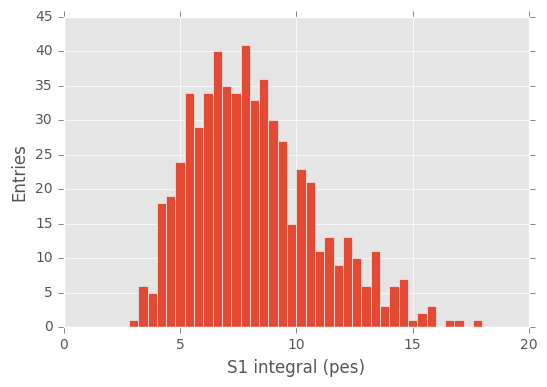

In [12]:
h = plt.hist(e, 50, range=(0,20))
plt.xlabel("S1 integral (pes)")
plt.ylabel("Entries")

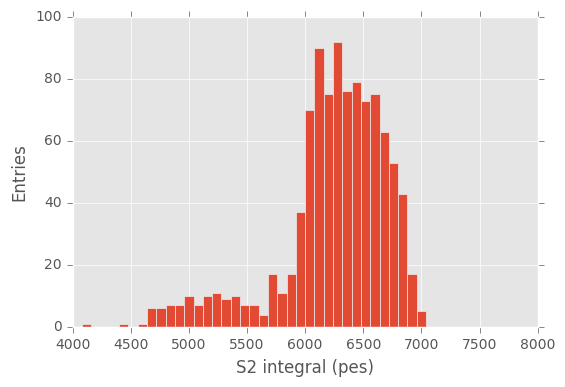

In [13]:
h = plt.hist(e, 50, range=(4000, 8000))
plt.xlabel("S2 integral (pes)")
plt.ylabel("Entries")

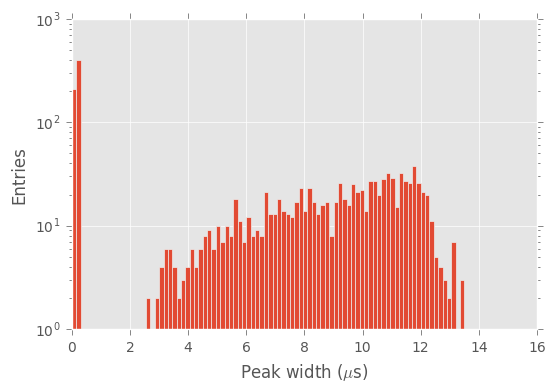

In [14]:
h = plt.hist(w, 100, range=(0, 15))
plt.yscale("log")
plt.xlabel("Peak width ($\mu$s)")
plt.ylabel("Entries")

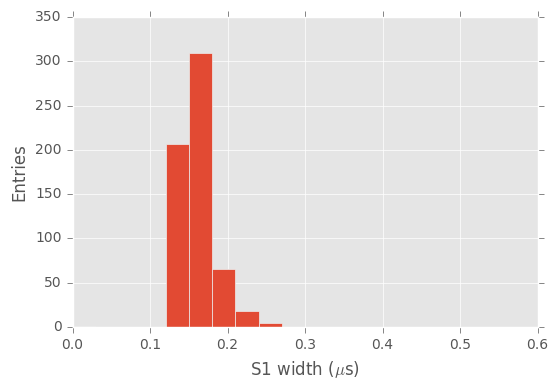

In [15]:
h = plt.hist(w, 20, range=(0, .6))
plt.xlabel("S1 width ($\mu$s)")
plt.ylabel("Entries")

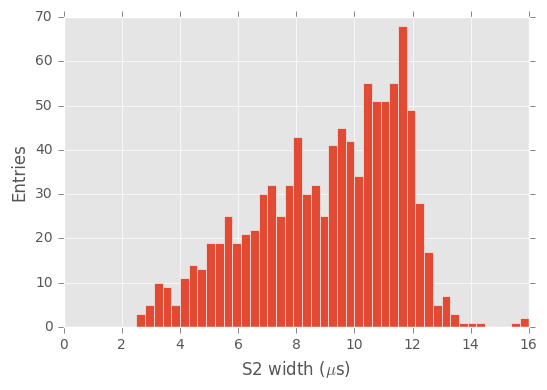

In [16]:
h = plt.hist(w, 50, range=(1, 16.))
plt.xlabel("S2 width ($\mu$s)")
plt.ylabel("Entries")

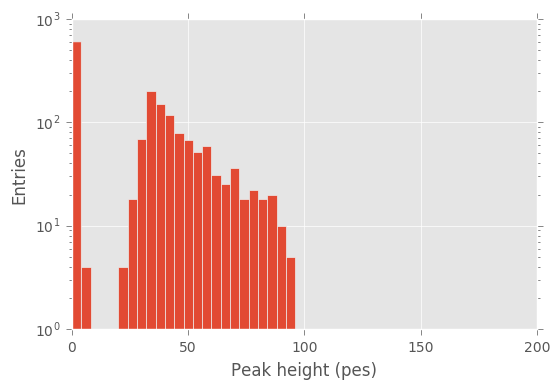

In [25]:
h = plt.hist(m, 50, range=(0, 200.))
plt.yscale("log")
plt.xlabel("Peak height (pes)")
plt.ylabel("Entries")

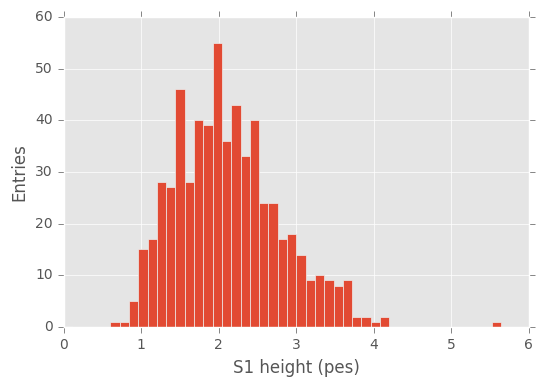

In [26]:
h = plt.hist(m, 50, range=(0, 6.))
plt.xlabel("S1 height (pes)")
plt.ylabel("Entries")

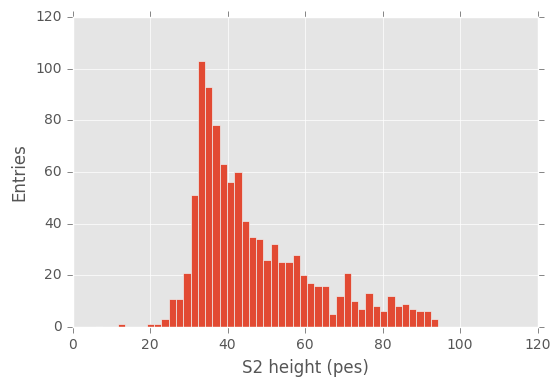

In [27]:
h = plt.hist(m, 50, range=(6, 100.))
plt.xlabel("S2 height (pes)")
plt.ylabel("Entries")

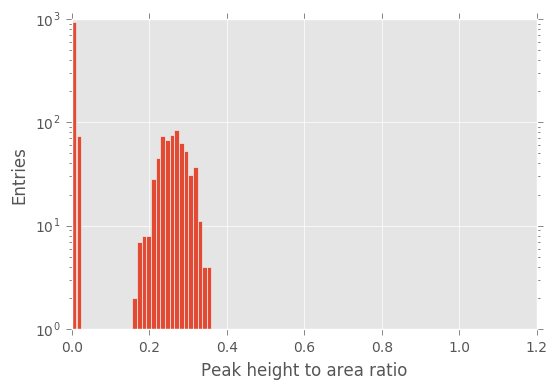

In [28]:
h = plt.hist(r, 100, range=(0, 1.2))
plt.yscale("log")
plt.xlabel("Peak height to area ratio")
plt.ylabel("Entries")

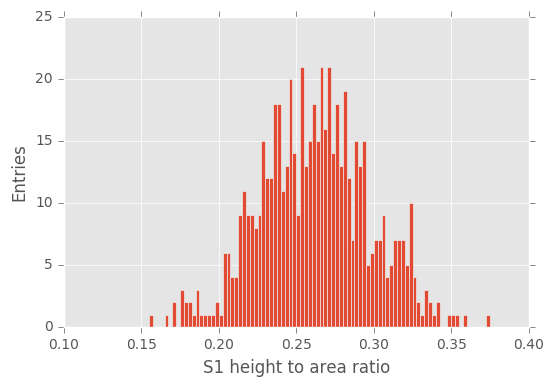

In [30]:
h = plt.hist(r, 100, range=(0.15, 0.4))
plt.xlabel("S1 height to area ratio")
plt.ylabel("Entries")

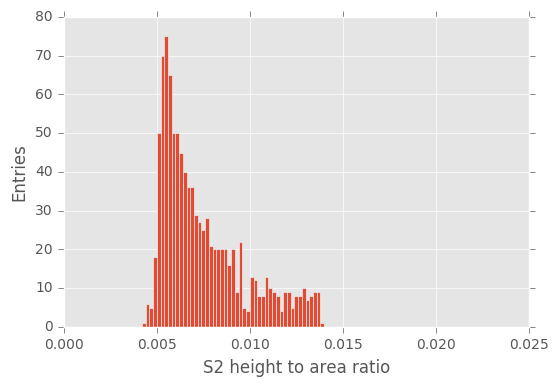

In [22]:
h = plt.hist(r, 100, range=(0., 0.02))
plt.xlabel("S2 height to area ratio")
plt.ylabel("Entries")